# Computer Vision Assignment 1 Q3 : Crack Detection

In [29]:
import cv2
import numpy as np  
from matplotlib import pyplot as plt
from matplotlib import style

%matplotlib inline

In [30]:
# function to filter small blob noises and detect crack

def segmentCrack (img,minSize,imgTitle,detectCrack=True):
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    img2 = np.zeros((labels.shape), np.uint8)

    for i in range(0, nlabels - 1):
        if sizes[i] >= minSize :       #filter small dotted regions, only keep components bigger than minSize
            img2[labels == i + 1] = 255

    res = cv2.bitwise_not(img2)
    
 
    ret, labels = cv2.connectedComponents(res) # count the number of connected components
    
    # show message if crack is detected
    # have the choice of whether or not we want to show the message, default is show the message, else set detectCrack=False
    
    if (detectCrack==True):
        if (len(np.unique(labels))-1)>=1 : # one component is the background
            s = 'Crack detected'         
            boxColor = 'red'
        else :
            s = "Good wall condition"
            boxColor = 'green'
    
        output= plt.imshow(res,cmap='gray'),plt.axis('off'),plt.text(50, 50, s,fontSize=15,color='yellow', bbox=dict(facecolor=boxColor,alpha=0.5)),plt.title(imgTitle)
    else :
        output=plt.imshow(res,cmap='gray'),plt.axis('off'),plt.title(imgTitle)
    
    return res # return the segmented image

## No Crack

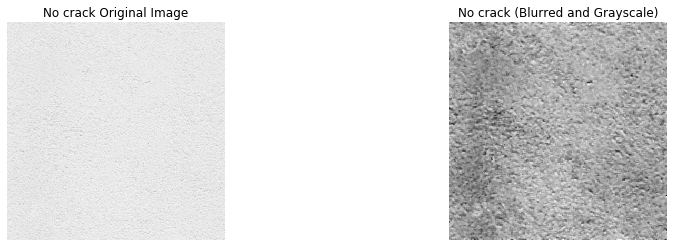

In [31]:
no_crack = cv2.imread('q3_no_crack.jpg')

# reduce noise with median blur
no_crack_blur = cv2.medianBlur(no_crack,5)
# convert picture to grayscale
no_crack_gray = cv2.cvtColor(no_crack_blur,cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(no_crack,cmap='gray'), plt.axis('off'),plt.title("No crack Original Image")
plt.subplot(1,2,2)
plt.imshow(no_crack_gray,cmap='gray'), plt.axis('off'),plt.title("No crack (Blurred and Grayscale)")
plt.subplots_adjust(right=2)

We can see from the image that the no_crack image has some uneven illumination problem. It its darker on the left and right side of the image and lighter in the middle.

(<matplotlib.image.AxesImage at 0x2d6a2245e48>,
 (-0.5, 413.5, 413.5, -0.5),
 Text(0.5, 1.0, 'No crack (after adaptive thresholding)'))

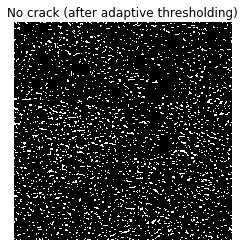

In [32]:
# use adaptive threshold to convert the image to binary 

no_crack_threshold = cv2.adaptiveThreshold(no_crack_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.imshow(no_crack_threshold,cmap='gray'),plt.axis('off'),plt.title("No crack (after adaptive thresholding)")

No lines shown, only small blobs of noise

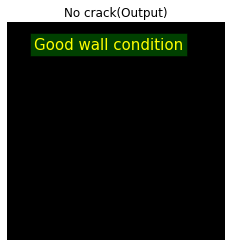

In [33]:
output_no_crack=segmentCrack(no_crack_threshold,1200,"No crack(Output)")

## Crack 1

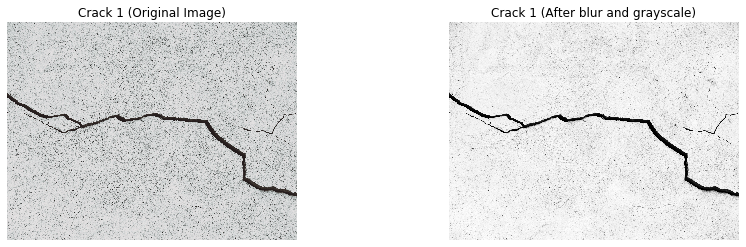

In [34]:
crack_1 = cv2.imread('q3_crack_1.jpg')

crack_1_blur = cv2.medianBlur(crack_1,5)
crack_1_gray = cv2.cvtColor(crack_1_blur,cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(crack_1,cmap='gray'),plt.axis('off'),plt.title('Crack 1 (Original Image)')
plt.subplot(1,2,2)
plt.imshow(crack_1_gray,cmap='gray'),plt.axis('off'),plt.title("Crack 1 (After blur and grayscale)")
plt.subplots_adjust(right=2)

(Text(0.5, 1.0, 'Histogram for Crack 1'), (0, 256))

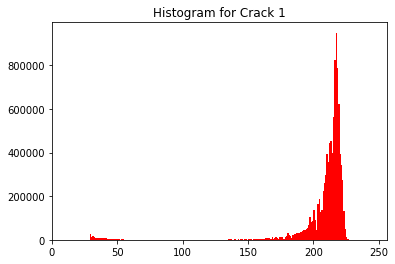

In [35]:
# plot the histogram for crack 1
plt.hist(crack_1_gray.ravel(),256,[0,256],color = 'r') 
plt.title('Histogram for Crack 1'), plt.xlim([0,256])

From the histogram, we can see that the minimum point of is somewhere around 60 to 130.
Choose 70 for thresholding.

(<matplotlib.image.AxesImage at 0x2d6a41a6548>,
 (-0.5, 3647.5, 2735.5, -0.5),
 Text(0.5, 1.0, 'Crack 1 after thresholding'))

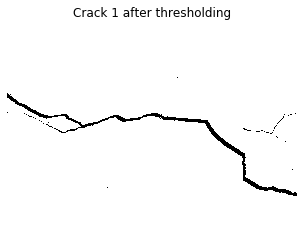

In [36]:
ret,crack_1_threshold = cv2.threshold(crack_1_gray,70,255,cv2.THRESH_BINARY)
plt.imshow(crack_1_threshold,cmap='gray'),plt.axis('off'),plt.title("Crack 1 after thresholding")

(<matplotlib.image.AxesImage at 0x2d695b5a948>,
 (-0.5, 3647.5, 2735.5, -0.5),
 Text(0.5, 1.0, 'Crack 1 after thresholding with OTSU'))

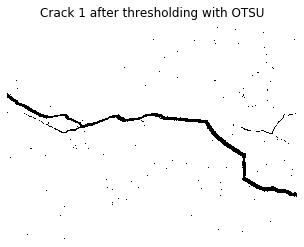

In [37]:
res,crack_1_otsu = cv2.threshold(crack_1_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(crack_1_otsu,cmap='gray'),plt.axis('off'),plt.title("Crack 1 after thresholding with OTSU")

We choose not to use OTSU as it does not provide the optimal value, the image is still noisy after threholding.

(<matplotlib.image.AxesImage at 0x2d6a2dc7608>,
 (-0.5, 3647.5, 2735.5, -0.5),
 Text(0.5, 1.0, 'Crack 1 (Canny edge)'))

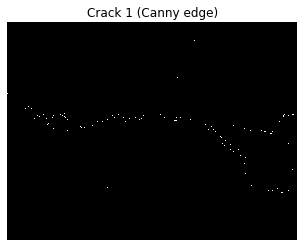

In [38]:
# use canny edge detector to get the line of the crack

crack_1_edge = cv2.Canny(crack_1_threshold,10,20)
plt.imshow(crack_1_edge, cmap='gray'), plt.axis('off'),plt.title("Crack 1 (Canny edge)")

The silhouette of the crack is there but it is not clear.

(<matplotlib.image.AxesImage at 0x2d6a24ec1c8>,
 (-0.5, 3647.5, 2735.5, -0.5),
 Text(0.5, 1.0, 'Crack 1 (Closing)'))

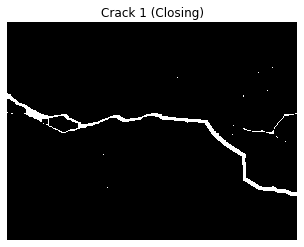

In [39]:
# apply closing to fill in the lines

se= cv2.getStructuringElement(cv2.MORPH_RECT,(50,50))
crack_1_closing = cv2.morphologyEx(crack_1_edge, cv2.MORPH_CLOSE, se)
plt.imshow(crack_1_closing,cmap='gray'), plt.axis('off'), plt.title('Crack 1 (Closing)')

Crack is shown after closing but so does the noise.

(<matplotlib.image.AxesImage at 0x2d6a2553c48>,
 (-0.5, 3647.5, 2735.5, -0.5),
 Text(0.5, 1.0, 'Crack 1 (Opening)'))

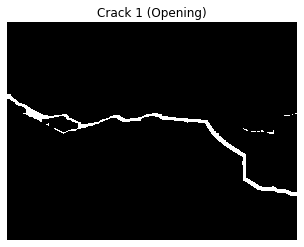

In [40]:
# apply opening to get rid of noise

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
crack_1_opening = cv2.morphologyEx(crack_1_closing, cv2.MORPH_OPEN, kernel)
plt.imshow(crack_1_opening,cmap='gray'), plt.axis('off'),plt.title('Crack 1 (Opening)')

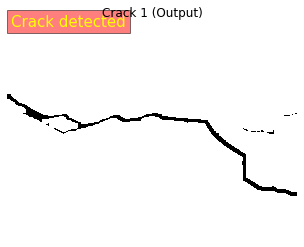

In [41]:
output_crack_1 = segmentCrack(crack_1_opening,0,"Crack 1 (Output)")

blobsize set to 0 because there are no more small dotted noise after opening operation

## Crack 2

In [42]:
crack_2 = cv2.imread('q3_crack_2.jpg')

(<matplotlib.image.AxesImage at 0x2d6a23c6088>,
 (-0.5, 1790.5, 1342.5, -0.5),
 Text(0.5, 1.0, 'Crack 2 (After blurring and grayscale)'))

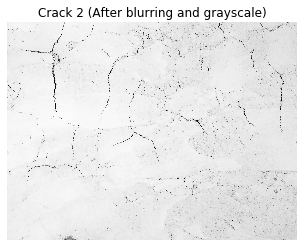

In [43]:
# Apply bilateral filter with d = 15, if it's too big it's slow
# sigmaColor = sigmaSpace = 75. 
# choose bilateral filter because crack 2 has thinner lines
crack_2_blur = cv2.bilateralFilter(crack_2,15,75,75)

# convert image to grayscale before thresholding the image
crack_2_gray = cv2.cvtColor(crack_2_blur,cv2.COLOR_BGR2GRAY)
plt.imshow(crack_2_gray,cmap='gray'),plt.axis('off'),plt.title("Crack 2 (After blurring and grayscale)")

Bilateral filter is chosen for crack 2 because the cracks are thinner, bilateral filter is better than median filter when perserving edges. If we apply median filter it will blur out the lines as well.

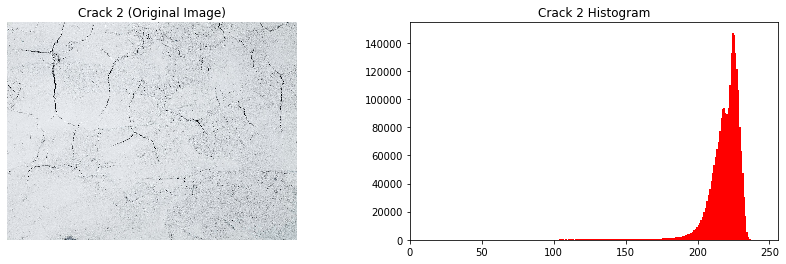

In [44]:
# plot the histogram for the image
plt.subplot(1,2,1)
plt.imshow(crack_2,cmap='gray'),plt.axis('off'),plt.title("Crack 2 (Original Image)")
plt.subplot(1,2,2)
plt.hist(crack_2_gray.ravel(),256,[0,256],color = 'r') 
plt.title('Crack 2 Histogram'), plt.xlim([0,256])
plt.subplots_adjust(right=2)

As can seen from the original image and the histogram, the contrast of the image is not balanced. Perform contrast stretching to fix this.

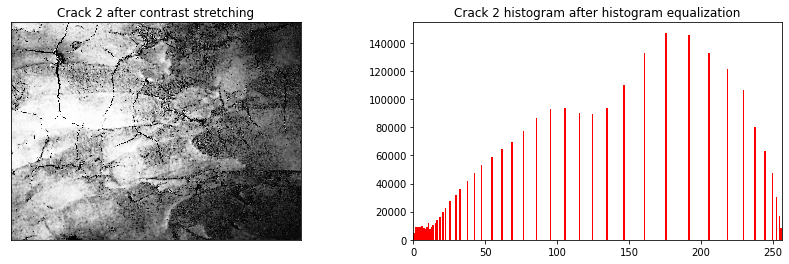

In [45]:
crack2_gray_equ = cv2.equalizeHist(crack_2_gray)
plt.subplot(1,2,1)
plt.imshow(crack2_gray_equ, cmap='gray'), plt.title('Crack 2 after contrast stretching'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.hist(crack2_gray_equ.ravel(),256,[0,256],color = 'r') 
plt.title('Crack 2 histogram after histogram equalization'), plt.xlim([0,256])
plt.subplots_adjust(right=2)

(<matplotlib.image.AxesImage at 0x2d6a2193b88>,
 (-0.5, 1790.5, 1342.5, -0.5),
 Text(0.5, 1.0, 'Crack 2 after thresholding'))

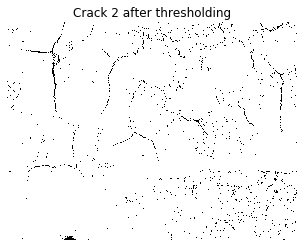

In [46]:
# threshold the image
ret,cracK_2_threshold = cv2.threshold(crack2_gray_equ,5,255,cv2.THRESH_BINARY)
plt.imshow(cracK_2_threshold,cmap='gray'),plt.axis('off'),plt.title("Crack 2 after thresholding")

(<matplotlib.image.AxesImage at 0x2d6a2c48f88>,
 (-0.5, 1790.5, 1342.5, -0.5),
 Text(0.5, 1.0, 'Crack 2 (After Opening)'))

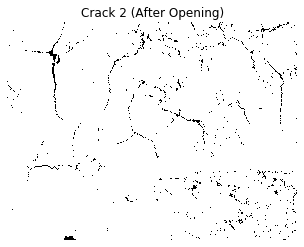

In [47]:
# perform opening to reduce noise

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
crack_2_opening = cv2.morphologyEx(cracK_2_threshold, cv2.MORPH_OPEN, kernel)

plt.imshow(crack_2_opening,cmap='gray'), plt.axis('off'),plt.title('Crack 2 (After Opening)')

Perform opening to reduce the noise, still has small dotted noise. Can't use a bigger kernel without risking removing the thin lines

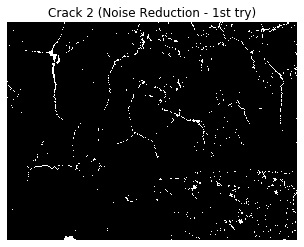

In [48]:
# further noise reduction by removing the small blobs

crack_2_first= segmentCrack(crack_2_opening,1000,"Crack 2 (Noise Reduction - 1st try)",False)

(<matplotlib.image.AxesImage at 0x2d6962848c8>, (-0.5, 1790.5, 1342.5, -0.5))

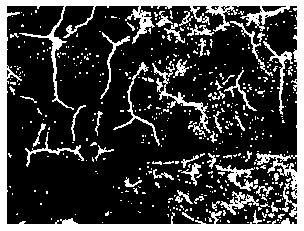

In [49]:
# Apply dilation

kernel = np.ones((5,5),np.uint8)
crack_2_dilation = cv2.dilate(crack_2_first, kernel, iterations = 2)
plt.imshow(crack_2_dilation,cmap='gray'), plt.axis('off')

Further noise reduction is need, but because the crack lines are thin in nature, we first apply dilation so that the lines won't be mistaken for small blobs of noise.

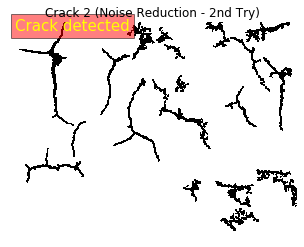

In [50]:
# apply noise reduction again 

output_crack_2 = segmentCrack(crack_2_dilation,3000,"Crack 2 (Noise Reduction - 2nd Try)")

## Crack 3

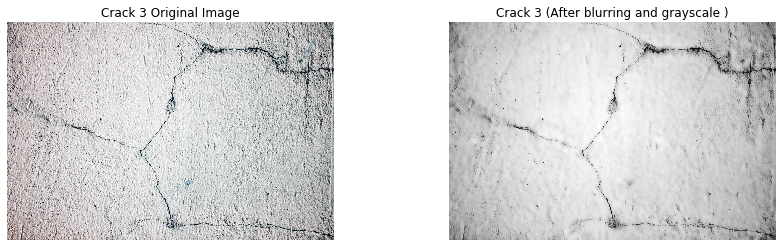

In [51]:
crack_3 = cv2.imread('q3_crack_3.jpg')

# Convert image to grayscale
crack_3_gray =  cv2.cvtColor(crack_3,cv2.COLOR_BGR2GRAY) 

# Apply bilateral filter for noise removal while perserving edges
crack_3_blur = cv2.bilateralFilter(crack_3_gray,21,70,70)

plt.subplot(1,2,1)
plt.imshow(crack_3, cmap='gray'), plt.axis('off'),plt.title("Crack 3 Original Image")
plt.subplot(1,2,2)
plt.imshow(crack_3_blur, cmap='gray'), plt.axis('off'),plt.title("Crack 3 (After blurring and grayscale )")
plt.subplots_adjust(right=2)

The rough texture of the wall is smoothen significantly while the lines are still clearly visible.

(<matplotlib.image.AxesImage at 0x2d6a20885c8>,
 (-0.5, 1299.5, 865.5, -0.5),
 Text(0.5, 1.0, 'Crack 3 (After canny edge detector)'))

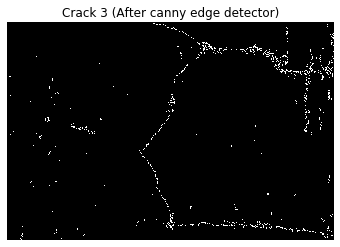

In [52]:
# Apply canny edge to detect the line

crack_3_edge = cv2.Canny(crack_3_blur,100,400)
plt.imshow(crack_3_edge, cmap='gray'), plt.axis('off'),plt.title('Crack 3 (After canny edge detector)')

(<matplotlib.image.AxesImage at 0x2d6a20bb748>, (-0.5, 1299.5, 865.5, -0.5))

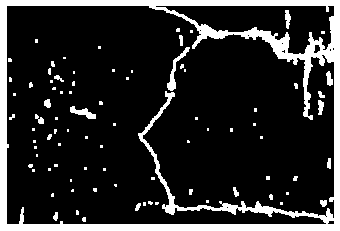

In [53]:
# Apply dilation to fill in the lines

kernel = np.ones((5,5),np.uint8)
crack_3_dilation = cv2.dilate(crack_3_edge, kernel, iterations = 2)
plt.imshow(crack_3_dilation,cmap='gray'), plt.axis('off')

Noise increase with dilation, call segmentCrack to remove them

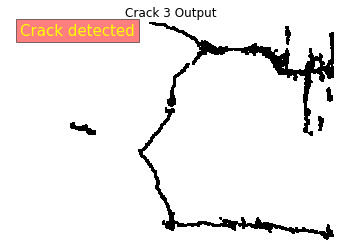

In [54]:
output_crack_3 = segmentCrack(crack_3_dilation,1000,"Crack 3 Output")

## Results / Output

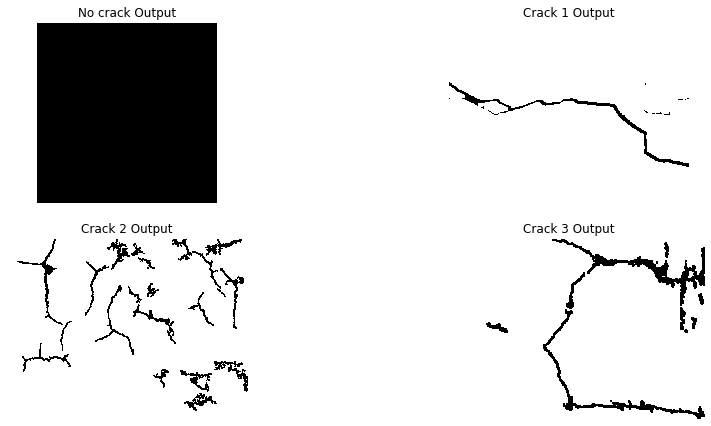

In [55]:
plt.subplot(2,2,1)
plt.imshow(output_no_crack,cmap="gray"),plt.axis('off'),plt.title("No crack Output")
plt.subplot(2,2,2)
plt.imshow(output_crack_1,cmap="gray"),plt.axis('off'),plt.title("Crack 1 Output")
plt.subplot(2,2,3)
plt.imshow(output_crack_2,cmap="gray"),plt.axis('off'),plt.title("Crack 2 Output")
plt.subplot(2,2,4)
plt.imshow(output_crack_3,cmap="gray"),plt.axis('off'),plt.title("Crack 3 Output")
plt.subplots_adjust(right=2,top=1.5)

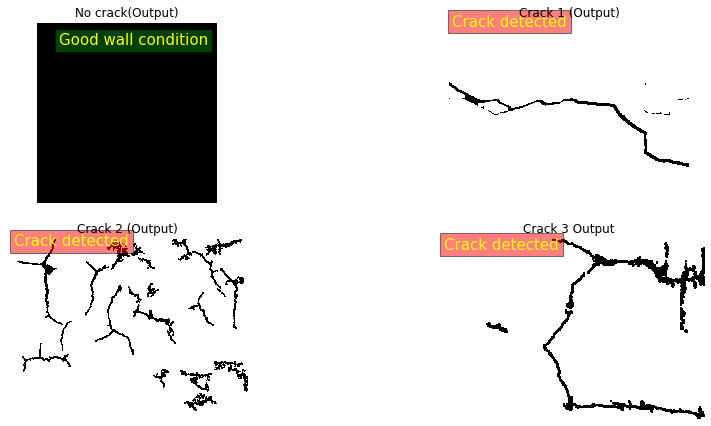

In [56]:
plt.subplot(2,2,1)
segmentCrack(no_crack_threshold,1200,"No crack(Output)")
plt.subplot(2,2,2)
segmentCrack(crack_1_opening,0,"Crack 1 (Output)")
plt.subplot(2,2,3)
segmentCrack(crack_2_dilation,3000,"Crack 2 (Output)")
plt.subplot(2,2,4)
segmentCrack(crack_3_dilation,1200,"Crack 3 Output")
plt.subplots_adjust(right=2,top=1.5)